# ***Hola Mundo en Redes Neuronales***


### Tabla de contenidos
- [Librerias](#1)
- [Introducción](#2)
    - [Ejercicio 1](#ex-1)
    - [Ejercicio 2](#ex-2)
- [Arquitectura del algoritmo de aprendizaje](#3)
    - [Ejercicio 3](#ex-1)
    - [Ejercicio 4](#ex-2)
- [Vectorización](#4)
    - [Ejercicio 5](#ex-2)
- [Propagación](#4)
    - [Ejercicio 6](#ex-2)
- [Ajuste de parametros](#4)
    - [Ejercicio 7](#ex-2)
- [Predicción](#5)
    - [Ejercicio 8](#ex-8)
- [Creación del modelo](#9)
    - [Ejercicio 9](#9)
- [Resultados](#6)


## ***Librerias***

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time 
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline


## ***Introducción***
Nuestro objetivo es crear un algoritmo que pueda identificar si una imagen muestra un gato, sin recurrir a bibliotecas avanzadas de deep learning como TensorFlow, PyTorch o Scikit-learn. En lugar de ello, basaremos nuestra implementación en NumPy, aprovechando los fundamentos matemáticos en los que se apoya el aprendizaje profundo. Esta aproximación nos permitirá entender cómo los conceptos matemáticos se aplican en la programación para lograr la clasificación de imágenes.


Conocimiento previos :

- Matrices y Vectores

- Derivadas 
    
- Python Basico 

    

Objetivos principales:

- Comprender la importancia de las dimensiones, tanto en las entradas como en las salidas de un perceptrón, y cómo estas afectan el procesamiento de la información.

- Explorar las funciones básicas que componen un perceptrón y su papel en la construcción de modelos de deep learning.
    
- Aprender el proceso de ajuste de parámetros mediante técnicas de regresión, esencial para la optimización de nuestros modelos.





In [2]:
train_set_x,train_set_y,test_set_x,test_set_y,classes=load_dataset()

print(f"las dimensiones de nuestras base de datos x entrenamiento  estan dadas por {train_set_x.shape}")
print(f"las dimensiones de nuestras base de datos x testeo  estan dadas por {test_set_x.shape}")

las dimensiones de nuestras base de datos x entrenamiento  estan dadas por (209, 64, 64, 3)
las dimensiones de nuestras base de datos x testeo  estan dadas por (50, 64, 64, 3)



***Prueba de imágenes***

En esta sección puedes modificar el valor de "idx" para seleccionar una imagen diferente de la base de datos.

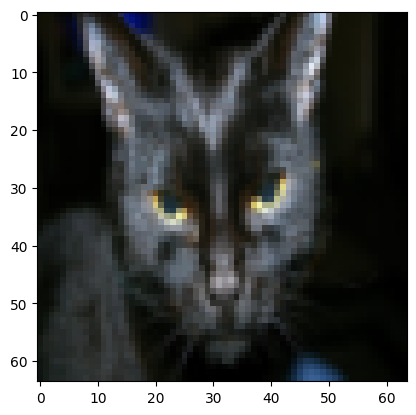

In [3]:
idx=20
plt.imshow(train_set_x[25])

### **Ejercicio 1**

Nombre las siguientes variables (`m_train`,`m_test`,`nx`) las cuales contienes los valores de :
    
    m_train -> Numero de muestras para entrenamiento
    
    m_test -> Numero de muestras para testeo
    
    nx ->Numero de pixeles de cada foto

In [4]:

# ---------------CODIGO ------------------#
m_train = train_set_x.shape[0] 
m_test = test_set_x.shape[0]
nx = train_set_x.shape[1]

#------------------------------------------#

assert type(m_train)==int,"Mala tipo de dato"
assert np.around(np.exp(m_train/100),1)==8.1,"Mala Dimension"

assert type(m_test)==int,"Mala tipo de dato"
assert np.around(np.exp(m_test/100),1)==1.6,"Mala Dimension"

assert type(nx)==int,"Mala tipo de dato"
assert np.around(np.exp(nx/100),1)==1.9,"Mala Dimension"

print('\033[92m todos los test se pasaron!\n')
print ("train_set_x Dimension: " + str(train_set_x.shape))
print ("train_set_y Dimension: " + str(train_set_y.shape))
print ("test_set_x Dimension: " + str(test_set_x.shape))
print ("test_set_y Dimension: " + str(test_set_y.shape))

 todos los test se pasaron!

train_set_x Dimension: (209, 64, 64, 3)
train_set_y Dimension: (1, 209)
test_set_x Dimension: (50, 64, 64, 3)
test_set_y Dimension: (1, 50)


### **Ejercicio 2**

En este ejercicio, transformaremos las imágenes, originalmente en formato tridimensional  $(altura*anchura*canales,1)$
en matrices bidimensionales .

Recordemos que nuestra entrada sera:


$$\mathbf{x} \in \mathbb{R}^{n_x \times m}$$

***Consejo***

Puedes utilizar la función np.reshape()

In [5]:

# ---------------CODIGO ------------------#
train_set_x_plano = train_set_x.reshape(train_set_x.shape[0],-1).T
test_set_x_plano = test_set_x.reshape(test_set_x.shape[0],-1).T
#------------------------------------------#


assert np.alltrue(train_set_x_plano[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Mala respuesta"
assert np.alltrue(test_set_x_plano[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Mala respuesta"

print('\033[92m todos los test se pasaron!\n')
print ("train_set_x_plano Dimensiones: " + str(train_set_x_plano.shape))
print ("train_set_y Dimensiones: " + str(train_set_y.shape)+"\n")

print ("test_set_x_plano Dimensiones: " + str(test_set_x_plano.shape))
print ("test_set_y Dimensiones: " + str(test_set_y.shape))

 todos los test se pasaron!

train_set_x_plano Dimensiones: (12288, 209)
train_set_y Dimensiones: (1, 209)

test_set_x_plano Dimensiones: (12288, 50)
test_set_y Dimensiones: (1, 50)


Estandarizamos las imagenes dividiendo cada fila de la base de datos por 255 el cual es el valor max

In [6]:
train_set_x = train_set_x_plano / 255.
test_set_x = test_set_x_plano / 255.

## ***Arquitectura del algoritmo de aprendizaje***


<center> <img src="./LogReg_kiank.png" style="width:650px;height:400px;" > </center> 

### **Ejercicio 3**
Implemente la funcion sigmoide , la cual esta expresada como:

$\sigma(x) = \frac{1}{1 + e^{-x}}$

In [9]:
def sigmoide(z):
    """
    Computamos la funcion sigmoide

    Input:
    z -- Un escalar o arreglo numpy  de cualquier tamaño.

    Return:
    s -- sigmoid(z)
    """
#-------------CODIGO----------------#
    return 1/(1+np.exp(-z))

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoide(np.array([0,2]))))

sigmoid_test(sigmoide)

sigmoid([0, 2]) = [0.5        0.88079708]
 todos los test se pasaron!


### **Ejercicio 4**

***Inicialización de Parámetros*** 

Implementamos la función inicializamos_params() para inicializar los parametros en ceros recordemos que:

$$W \in \mathbb{R}^{nx}$$

$$ b \in \mathbb{R} $$

In [23]:

def inicializamos_params(dim):
    """
    Esta funcion crea un vector de ceros de dimensiones (dim, 1) con el fin de inicializar los parametros w y b
    
    Argument:
    dim -- (Numero de parametros)
    
    Returns:
    w -- inicializamos los vectores con dimensiones (dim, 1)
    b -- inicializamos el bias correspondiente a un escalar
    """
    #-------------CODIGO----------------#
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [24]:
dim = 2
w, b = inicializamos_params(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(inicializamos_params)
initialize_with_zeros_test_2(inicializamos_params)


w = [[0.]
 [0.]]
b = 0.0
Primer Test pasado
Segundo Test pasado


## ***Vectorización***

### **Ejercicio 5**

Implemente 2 Codigos  en los cuales se realize el producto punto Y posteriormente obtenga la media entre $X \in \mathbb{R}^{nx \times m}$  y una matriz sintetica compuesta de  unos $W \in \mathbb{R}^{1 \times nx}$ 

con el fin entender la diferencia en realizar  operaciones matriciales por medio de iteraciones  y operaciones por medio de metodos de los arreglos de numpy

    1. Realize la operacion producto punto y posteriormente obtenga la media del vector restante utilizando solo for loops 
    
    2. Realize la operacion  producto punto y posteriormente obtenga la media usando metodos de numpy

In [13]:
#------------------NO TOCAR----------------#
x_array=train_set_x
w_array=np.ones((1,train_set_x.shape[0]))

#---------------------------------------------#
print(f"Matriz x --> {x_array.shape}")
print(f"Matriz w --> {w_array.shape}")

Matriz x --> (12288, 209)
Matriz w --> (1, 12288)


In [14]:
#----------------------CODIGO------------------------------#
count = 0
for i in range(x_array.shape[0]):
    count += w_array[0][i]*x_array[i]

x = 0
for j in count:
    x += j

#------------------------------------------------------------#


In [15]:
#----------------------CODIGO------------------------------#
print(np.dot(w_array, x_array).mean())

#------------------------------------------------------------#

4963.731625856087


## ***Propagación***


### **Ejercicio 6**

Implementaremos la funcion *propagacion()* la cual calcula los siguientes pasos:

***Forward Propagation***

$$X \in \mathbb{R}^{n \times m}$$ 

$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$

***Cost Function***

$$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\ln(a^{(i)})+(1-y^{(i)})\ln(1-a^{(i)}))$$

***Backward Propagation***

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(\frac{\partial J}{\partial z})^T\tag{7}$$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\frac{\partial J}{\partial z})\tag{8}$$

In [26]:

def propagacion(w, b, X, Y):
    """
    Esta funcion implementa el forward propagation ,cost function y backward propagation

    
    Input:

    w -> pesos, arreglo numpy de tamaño (nx * nx * 3, 1)
    b -> bias, escalar
    X -> datos de tamaño (num_px * num_px * 3, number of examples)
    Y -> vector de etiquetas verdaderes (contiene 0 si no es gato, 1 si es gato) tamaño (1, number of examples)

    Return:
    cost -- costo log-likelihood negativo para regresion logistica 
    dw -- gradiente de funcion de error respecto a w, mismas dimensiones de w
    db -- gradiente de funcion de error b, mismas dimensiones de b
    

    """
    #--------------NO TOCAR------------------#
    m = X.shape[1]
    #-----------------------------------------#

    #FORWARD
    A = sigmoide(np.dot(w.T,x) + b)

    #COST
    cost = -(1/m)*np.sum(-Y * np.exp(A) + (1 - Y) * np.log(1-A))

    #BACKWARD PROPAGATION
    dz = A - Y
    dw = (1/m)*np.dot(X, dz.T)
    db = (1/m)*np.sum 











    # ---------------NO TOCAR --------------#
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [27]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagacion(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagacion)

NameError: name 'x' is not defined

## ***Ajuste de parametros***

 


### **Ejercicio 7**
Escriba la funcion ajuste_parametros la cual tiene como objetivo poder actualizar los parametros  $W$ y $b$ con el fin de que minimizen la funcion de cost $J$.

Tenga en cuenta que:

<p style="text-align: center;">1. Calcular el costo y el gradiente para los parametros actuales.</p>

<p style="text-align: center;">2. Actualizar los parametros usando el gradiente descendiente </p>
    
Para un parametro $\theta$, la regla de actualizacion es $ \theta = \theta - \alpha \text{ } d\theta$  $\therefore$ $\alpha$= tasa de aprendizaje.

In [28]:

def ajuste_parametros(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    Esta funcion realize en ajuste de los pesos w y b utilizando el gradiente descendiente
    
    Input:
    w -- pesos, a numpy array of size (nx * nx * 3, 1)
    b -- bias, a scalar
    X -- dimensiones de los datos  (nx * nx * 3, m)
    Y -- vector de etiquetas verdaderes (contiene 0 si no es gato, 1 si es gato) tamaño (1, number of examples)
    num_iterations -- numero de iteraciones del ciclo ajuste_parametros
    learning_rate -- learning rate del gradiente descendiente 
    print_cost -- True imprimir el costo cada 100 iteraciones



    Return:
    params -- diccionario que contiene los pesos de w y b
    grads -- diccionario que contiene las derivadas parciales de w y b de la funcion de costo 
    costs -- lista de todos los costos calculados durante el ajuste
    """
    #---------------NO TOCAR--------------------#
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    #-------------------------------------------#
    
    for i in range(num_iterations):
        #----------------------CODIGO--------------------------#
        grads, cost = propagacion(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b= b - learning_rate*db

        #---------------------NO TOCAR-------------------#
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [29]:
params, grads, costs = ajuste_parametros(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

ajuste_parametros_test(ajuste_parametros)

NameError: name 'x' is not defined

## ***Predicción***


### **Ejercicio 8**


La funcion anterior nos permite obtener los parametros aprendidos para  $W$ y $b$. 

Ahora utilizaremos estos parametros para realizar las predicciones para las etiquetas de la base de datos $X$.

Implemente la funcion `predict()` la cual tiene 2 pasos:


1. Calcular  $\hat{Y} = A = \sigma(w^T X + b)$

2. Convertir las entradas a 0 (si activation <= 0.5) o  1 (si activation > 0.5) y guardar las predicciones en el vector  `Y_prediction`

In [31]:

def predict(w, b, X):
    '''
    Predecir si la etiqueta es 0 o 1 dependiendo de los parameteros reajustados de la regresion logistica(w, b)
    
    Inputs:
    w -- pesos, arreglo de numpy de tamaño  (nx * nx * 3, 1)
    b -- bias, a scalar
    X -- los datos de tamaño (nx * nx * 3,m)
    
    Returns:
    Y_prediction -- un arreglo de numpy el cual contiene todas las predicciones (0/1) para los ejemplos en X
    '''
#-----------------NO TOCAR---------------#
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

#----------------------CODIGO-----------------------#

    A = sigmoide(w.T.dot(X) + b)
    for i in range(A.shape[0]):
        if A[1,i] > 0.5:
            Y_predictions = 1
        else:
            Y_predictions = 0












#----------------------NO TOCAR---------------------#
    return Y_prediction


In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

## ***Creación del Modelo***
### Ejercicio 9
Finalmente, nos enfocaremos en consolidar nuestro modelo. Este proceso implica integrar todas las funciones desarrolladas anteriormente en una secuencia lógica y ordenada, con el objetivo de conformar el algoritmo de detección completo.

Utilice las siguientes notaciones en la implementación: :

    - Y_prediction_test --> predicciones en el test set

    - Y_prediction_train --> predicciones en el train set
    
    - parameters, grads, costs  --> salidas de la funcion ajuste_parametros

In [ ]:

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Construya el modelo de regression logistica utilizando las funciones anteriormente planteadas
    
    Inputs:
    X_train -- datos de entrenamiento en arreglo numpy (nx * nx * 3, m_train)
    Y_train -- etiquetas de los datos de entrenamiento en arreglo numpy (1, m_train)
    X_test -- datos de testo en arreglo numpy(num_px * num_px * 3, m_test)
    Y_test -- etiquetas de los datos de teteo en arreglo numpy (1, m_test)
    num_iterations -- hyperparametro: representa el numero de iteraciones el cual los parametros se ajustan 
    learning_rate -- hyperparametro:  representa el paso con el cual los parametros se ajustan
    print_cost -- True imprimir el costo cada 100 iteraciones
    
    Returns:
    d -- diccionario que contiene toda la funcion del modelo.
    """
    # Inicializamos los parametros

    # Ajustamos los parametros

    
    # Recibimos los parametros

    # Realizamos las predicciones para entrenamiento y testeo

    # ----------------NO TOCAR ---------------------------#
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
from public_tests import *

model_test(model)

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=3000, learning_rate=0.001, print_cost=True)

## ***Resultados***

In [ ]:

costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('iteraciones (10**2)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [ ]:
index = 9


plt.imshow(test_set_x[:, index].reshape((nx, nx, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Developed by :

    Joseph Felipe Grijalva Lozano - jgrijalva@unal.edu.co